In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix

import datetime as dt
from mpl_toolkits import mplot3d

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv(r"C:\Users\marwa\Downloads\OnlineRetail.csv\OnlineRetail.csv", encoding = "unicode_escape")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.shape

(541909, 8)

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Changing the invoice dates data type to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
df.duplicated().sum()

5268

In [10]:
df.drop_duplicates(keep = 'first', inplace=True)
df.shape

(536641, 8)

In [11]:
df.isna().sum()/df.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

In [12]:
df.Country.nunique()

38

In [13]:
df['Description'] = df.Description.str.lower()

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df[["Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,536641.0,9.620029,219.130156,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,536641.0,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0




- Quantity minimum and unit price are both negative!

- The dataset's outliers may be the reason.


In [16]:
df.loc[df.CustomerID.isnull(), ["UnitPrice", "Quantity"]].describe().T

,count,mean,std,min,25%,50%,75%,max
UnitPrice,135037.0,8.078342,151.924958,-11062.06,1.63,3.29,5.49,17836.46
Quantity,135037.0,1.996868,66.705155,-9600.00,1.00,1.00,3.00,5568.00


- Negative data for Quantity and UnitPrice are among the missing rows for Customers ID.

In [17]:
missing_desc = df.loc[df.Description.isnull()]
missing_desc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-01-12 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-01-12 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-01-12 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-01-12 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-01-12 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-07-12 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-07-12 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-07-12 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-08-12 10:33:00,0.0,NaN,United Kingdom


- We appear to have identical rows where the Customer ID and Description are missing. In addition, I noted that the unit price is 0.0, which is incorrect.
- 1454 Rows have missing value in both Description and Customer id.

In [18]:
missing_desc.UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

- This is what we anticipated, thus those 1454 records are invalid and contain missing values and incorrect values.
- Removing those rows is the best option.

In [19]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
len(df.CustomerID.unique())

4372

In [21]:
len(df.StockCode.unique())

3684

In [22]:
print(df['Description'].unique())

['white hanging heart t-light holder' 'white metal lantern'
 'cream cupid hearts coat hanger' ... 'pink crystal skull phone charm'
 'cream hanging heart t-light holder' 'paper craft , little birdie']


In [23]:
print("The number of sell positions are {}.\n".format(len(df['Description'].value_counts())))


print("The most popular merchandise in the E-commerce shop: \n\n{}.".format(df['Description'].value_counts()[:10]))

The number of sell positions are 3896.

The most popular merchandise in the E-commerce shop: 

white hanging heart t-light holder    2058
regency cakestand 3 tier              1894
jumbo bag red retrospot               1659
party bunting                         1409
assorted colour bird ornament         1405
lunch bag red retrospot               1345
set of 3 cake tins pantry design      1224
postage                               1196
lunch bag  black skull.               1099
pack of 72 retrospot cake cases       1062
Name: Description, dtype: int64.


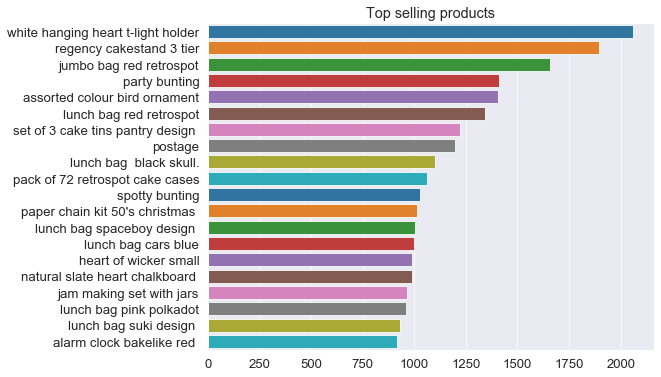

In [24]:
top_products = df['Description'].value_counts()[:20]
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values, 
           palette='tab10')
plt.title("Top selling products")
plt.show()

In [25]:
df['Country'].value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

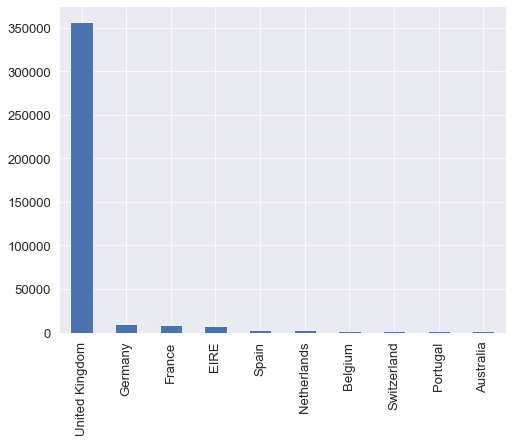

In [26]:
df.Country.value_counts().head(10).plot.bar(figsize=(8,6))

In [27]:
customer_country=df[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


In [28]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


In [29]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
no_products_per_transaction = temp.rename(columns = {'InvoiceDate':'Number of products'})
no_products_per_transaction[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


In [30]:
df['TotalAmount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,white hanging heart t-light holder,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,white hanging heart t-light holder,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [33]:
print(df[['InvoiceNo','Country']].groupby('Country').count().sort_values("InvoiceNo",ascending = False))

                      InvoiceNo
Country                        
United Kingdom           356728
Germany                    9480
France                     8475
EIRE                       7475
Spain                      2528
Netherlands                2371
Belgium                    2069
Switzerland                1877
Portugal                   1471
Australia                  1258
Norway                     1086
Italy                       803
Channel Islands             757
Finland                     695
Cyprus                      611
Sweden                      461
Austria                     401
Denmark                     389
Japan                       358
Poland                      341
USA                         291
Israel                      247
Unspecified                 241
Singapore                   229
Iceland                     182
Canada                      151
Greece                      146
Malta                       127
United Arab Emirates         68
European

In [34]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0.05]
df.describe()

,Quantity,UnitPrice,CustomerID,TotalAmount
count,392622.000000,392622.000000,392622.000000,392622.000000
mean,13.100127,3.126464,15287.928096,22.634659
std,180.495894,22.243780,1713.544575,311.126859
min,1.000000,0.060000,12346.000000,0.060000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.450000
75%,12.000000,3.750000,16791.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [35]:
retail = df.copy()

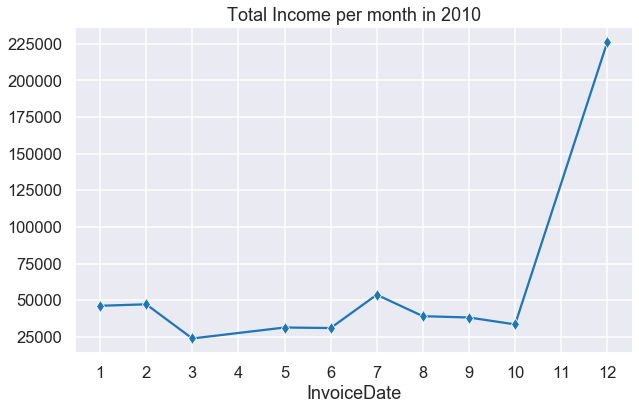

In [37]:
# Let's visualize the top grossing months
retail_month = retail[retail.InvoiceDate.dt.year==2010]
monthly_gross = retail_month.groupby(retail_month.InvoiceDate.dt.month).TotalAmount.sum()

plt.figure(figsize=(10,6))
sns.set_context("talk")
sns.set_palette("tab10")
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='d')
plt.xticks(range(1,13))
plt.title("Total Income per month in 2010")
plt.show()

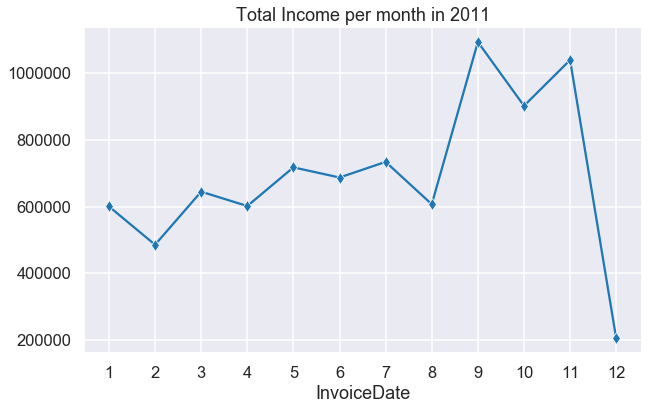

In [38]:
# Let's visualize the top grossing months
retail_month = retail[retail.InvoiceDate.dt.year==2011]
monthly_gross = retail_month.groupby(retail_month.InvoiceDate.dt.month).TotalAmount.sum()

plt.figure(figsize=(10,6))
sns.set_context("talk")
sns.set_palette("tab10")
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='d')
plt.xticks(range(1,13))
plt.title("Total Income per month in 2011")
plt.show()

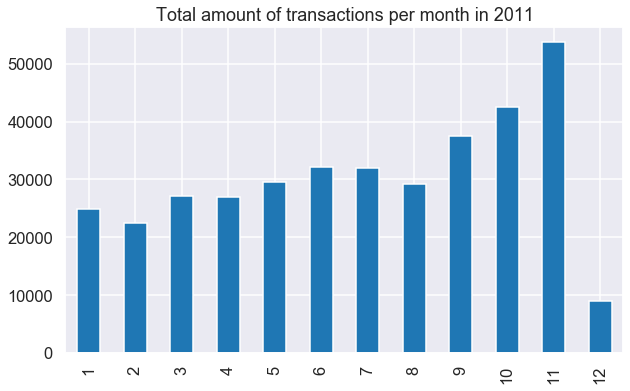

In [39]:
plt.figure(figsize=(10,6))
retail[retail.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar')
plt.title("Total amount of transactions per month in 2011")
plt.show()

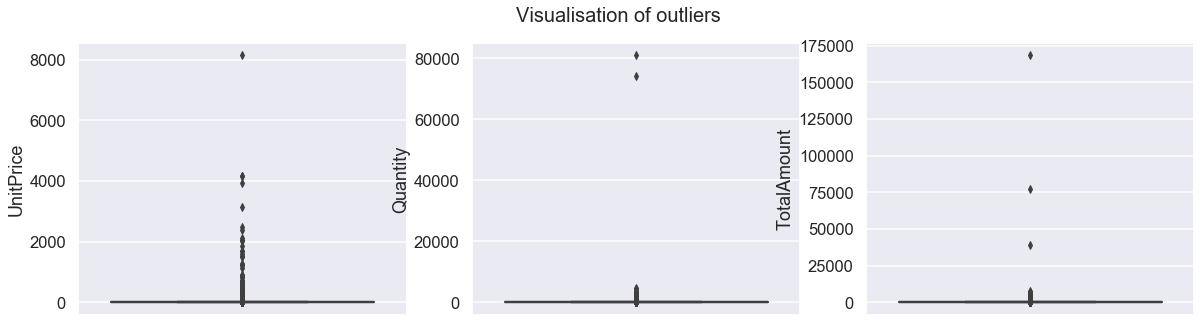

In [40]:
fig = plt.figure(figsize = (20,5))
fig.suptitle("Visualisation of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=df,y="UnitPrice")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=df,y="Quantity")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=df,y="TotalAmount")

In [41]:
df['TotalAmount'].groupby(df['CustomerID']).sum().reset_index()


,CustomerID,TotalAmount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


In [42]:
# Check the date variations in the DataFrame
print("Min Date: {} \t Max Date: {}".format(df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Min Date: 2010-01-12 08:26:00 	 Max Date: 2011-12-10 17:19:00


# RFM Analysis


### 
    RECENCY (R): Days since last purchase
    FREQUENCY (F): Total number of purchases
    MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

## Recency
#### To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [43]:
#last date in our dataset
df['InvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')

In [44]:
today = dt.date(2011,12,10)
print(today)

2011-12-10


In [45]:
#Create a new column called date which contains the date of invoice only
df['date'] = df['InvoiceDate'].dt.date

In [46]:
#group by customers and check last date of purshace
recency_df = df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12347.0,2011-10-31
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [47]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (today - x).days)

In [48]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,326
1,12347.0,2011-10-31,40
2,12348.0,2011-09-25,76
3,12349.0,2011-11-21,19
4,12350.0,2011-02-02,311


In [49]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

## Frequency

### Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.


In [50]:
# drop duplicates
df.copy = df
df.copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = df.copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


## Monetary

### Monetary attribute answers the question: How much money did the customer spent over time?

In [73]:
monetary_df = df.groupby(by='CustomerID',as_index=False).agg({'TotalAmount': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20


#### Create RFM Table

In [52]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346.0,326,1
1,12347.0,40,7
2,12348.0,76,4
3,12349.0,19,1
4,12350.0,311,1


In [53]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,40,7,163.16
12348.0,76,4,331.36
12349.0,19,1,15.00
12350.0,311,1,25.20


### RFM Table Correctness verification

In [54]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,date
61619,541431,23166,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011-01-18


In [55]:
(today - dt.date(2011,1,18)).days == 326

True

#### As we can see our RFM table is correct. The first customer bought only once, and only one product with huge amount.

Text(0.5, 0, 'Attributes')

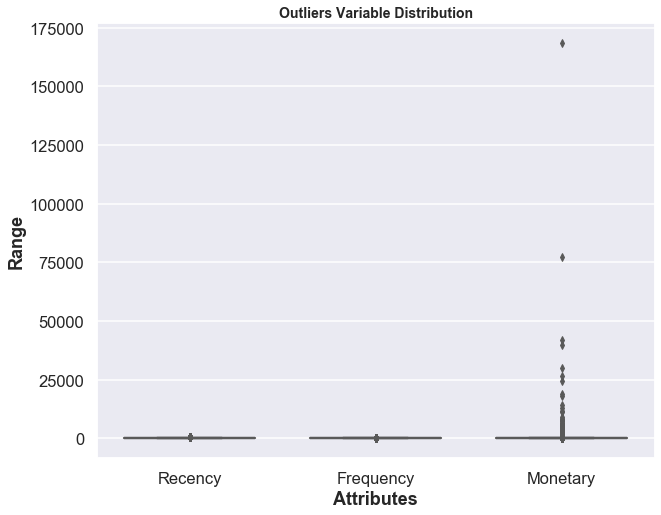

In [56]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Recency','Frequency','Monetary',]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm_df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [57]:
# Removing (statistical) outliers for Monetary
Q1 = rfm_df.Monetary.quantile(0.05)
Q3 = rfm_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Monetary >= Q1 - 1.5*IQR) & (rfm_df.Monetary <= Q3 + 1.5*IQR)]

In [58]:
# Removing (statistical) outliers for Recency
Q1 = rfm_df.Recency.quantile(0.05)
Q3 = rfm_df.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Recency >= Q1 - 1.5*IQR) & (rfm_df.Recency <= Q3 + 1.5*IQR)]

In [59]:
# Removing (statistical) outliers for Frequency
Q1 = rfm_df.Frequency.quantile(0.05)
Q3 = rfm_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Frequency >= Q1 - 1.5*IQR) & (rfm_df.Frequency <= Q3 + 1.5*IQR)]

#### Rescaling the Attributes by Standardisation

In [60]:
# Rescaling the attributes
import sklearn
from sklearn.preprocessing import StandardScaler

rfm = rfm_df[['Recency','Frequency', 'Monetary']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled.shape



(4221, 3)

In [61]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_scaled.head()

,Monetary,Frequency,Recency
0,-0.582958,0.901939,0.278579
1,-0.270806,0.110610,1.179766
2,-0.765046,-0.680719,-0.515238
3,1.766850,-0.680719,-0.460588
4,-0.296819,1.165715,2.277801


           Monetary  Frequency   Recency
Monetary   1.000000  -0.373229 -0.219047
Frequency -0.373229   1.000000  0.582941
Recency   -0.219047   0.582941  1.000000


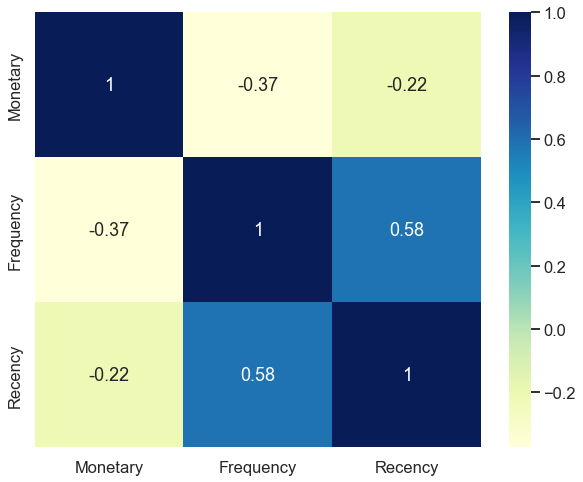

In [62]:
print(rfm_scaled.corr())
sns.heatmap(rfm_scaled.corr(),cmap="YlGnBu",annot=True)

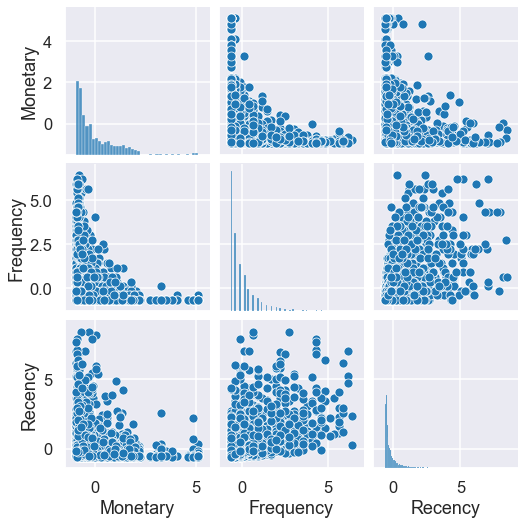

In [63]:
sns.pairplot(rfm_scaled, diag_kind="hist")

### Visualize feature distributions

#### To get a better understanding of the dataset, we can construct a scatter matrix of each of the three features present in the RFM data

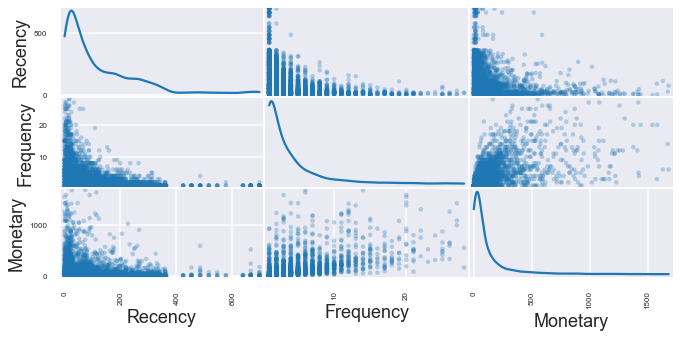

In [64]:
# Produce a scatter matrix for each pair of features in the data
scatter_matrix(rfm, alpha = 0.3, figsize = (11,5), diagonal = 'kde');

#### We can notice that we have a skewed distribution of the 3 variables and there exist outliers.

#### This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.


In [88]:
rfm.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.373229,-0.219047
Frequency,-0.373229,1.000000,0.582941
Monetary,-0.219047,0.582941,1.000000


#### 
Data Normalization

In [65]:
#log transformation
rfm_r_log = np.log(rfm['Recency']+0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(rfm['Frequency'])
rfm_m_log = np.log(rfm['Monetary']+0.1)

In [66]:
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log})

In [67]:
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12347.0,5.095344,3.691376,1.945910
12348.0,5.803507,4.332048,1.386294
12349.0,2.714695,2.949688,0.000000
12350.0,3.230804,5.740114,0.000000
12352.0,6.284880,4.291828,2.079442


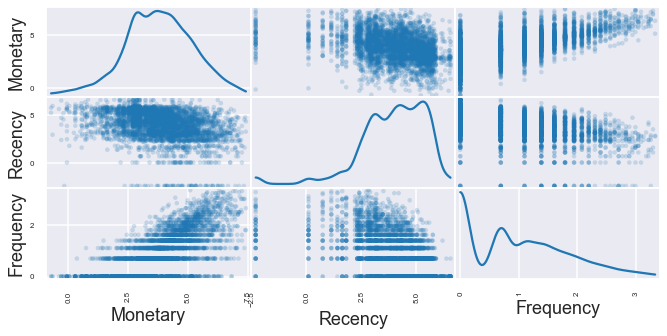

In [85]:
# Produce a scatter matrix for each pair of features in the data
scatter_matrix(log_data, alpha = 0.2, figsize = (11,5), diagonal = 'kde');

### The distributions of Frequency and Monetary are better, more normalized, but it's not the case with Recency Distribution, which is improved but not as much.

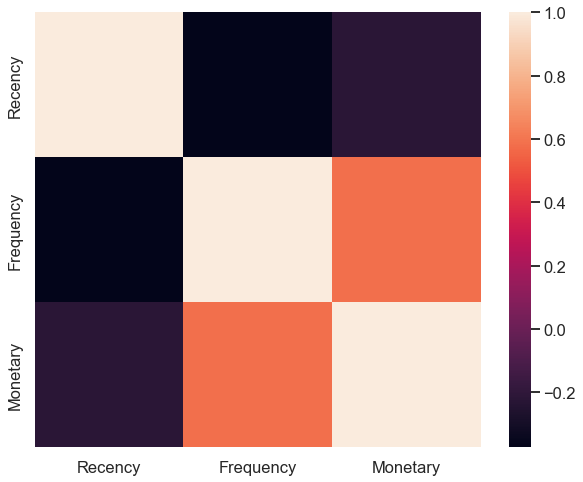

In [86]:
sns.heatmap(rfm.corr())

In [87]:
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.333339,0.699161
Recency,-0.333339,1.000000,-0.496347
Frequency,0.699161,-0.496347,1.000000


### Customer segments with RFM Model

#### 

Before moving to customer segments, Let's see the application of Pareto Principle – commonly referred to as the 80-20 rule on our dataset by applying it to our RFM variables.

Pareto’s rule says 80% of the results come from 20% of the causes.

Similarly, 20% customers contribute to 80% of your total revenue. Let's verify that because that will help us know which customers to focus on when marketing new products.


#### Applying 80-20 rule

In [68]:
#get the 80% of the revenue
pareto_cutoff = rfm_df['Monetary'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  375383.3


In [69]:
customers_rank = rfm_df
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=0)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
12347.0,40,7,163.16,773.0
12348.0,76,4,331.36,334.0
12349.0,19,1,15.00,3407.5
12350.0,311,1,25.20,2775.0
12352.0,73,8,536.30,157.0


### Top Customers

In [70]:
customers_rank.sort_values('Rank',ascending=True)

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
14101.0,74,6,1682.20,1.0
15694.0,26,14,1675.24,2.0
13027.0,114,6,1632.00,3.0
18172.0,5,20,1583.68,4.0
16041.0,90,3,1580.00,5.0
...,...,...,...,...
14041.0,267,1,0.58,4217.0
15645.0,19,1,0.42,4218.5
15503.0,363,1,0.42,4218.5


In [71]:
#get top 20% of the customers
top_20 = 3863 *20 /100
top_20

772.6

In [72]:
#sum the monetary values over the customer with rank <=773
RevenueByTop20 = customers_rank[customers_rank['Rank'] <= 772]['Monetary'].sum()
RevenueByTop20

310601.0

#### In our case, the 80% of total revenue is not achieved by the 20% of TOP customers but approximately, it does, because they are less than our 20% TOP customers who achieve it. It would be interesting to study this group of customers because they are those who make our most revenue.

###### 
Applying RFM score formula

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

#### RFM Quartiles

In [74]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary,Rank
0.25,23.0,1.0,17.50,1056.0
0.50,64.0,2.0,44.85,2111.0
0.75,164.0,4.0,118.60,3165.5


In [75]:
quantiles.to_dict()

{'Recency': {0.25: 23.0, 0.5: 64.0, 0.75: 164.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'Monetary': {0.25: 17.5, 0.5: 44.85, 0.75: 118.6},
 'Rank': {0.25: 1056.0, 0.5: 2111.0, 0.75: 3165.5}}

### Creation of RFM segmentation table

#### We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [76]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [77]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [78]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,
12347.0,40,7,163.16,773.0,3,4,4
12348.0,76,4,331.36,334.0,2,3,4
12349.0,19,1,15.00,3407.5,4,1,1
12350.0,311,1,25.20,2775.0,1,1,2
12352.0,73,8,536.30,157.0,2,4,4


In [79]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12347.0,40,7,163.16,773.0,3,4,4,344
12348.0,76,4,331.36,334.0,2,3,4,234
12349.0,19,1,15.00,3407.5,4,1,1,411
12350.0,311,1,25.20,2775.0,1,1,2,112
12352.0,73,8,536.30,157.0,2,4,4,244


#### Best Recency score = 4: Most recently purchase. Best Frequency score = 4: Most quantity purchase. Best Monetary score = 4: Spent the most.

### Let's take a look on our best customers 

In [80]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
18172.0,5,20,1583.68,4.0,4,4,4,444
18229.0,0,20,1542.96,6.0,4,4,4,444
16672.0,6,20,1440.48,7.0,4,4,4,444
16209.0,1,5,1422.72,9.0,4,4,4,444
16168.0,3,27,1419.76,10.0,4,4,4,444
16705.0,6,20,1377.62,12.0,4,4,4,444
14088.0,11,13,1376.38,13.0,4,4,4,444
16779.0,9,22,1303.33,14.0,4,4,4,444
15298.0,11,12,1288.52,15.0,4,4,4,444


#### How many customers do we have in each segment?


In [81]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  378
Loyal Customers:  1013
Big Spenders:  1055
Almost Lost:  100
Lost Customers:  10
Lost Cheap Customers:  397


#### Now that we knew our customers segments we can choose how to target or deal with each segment.

Apparently there are 15% of customers considered as Champions. These customers are responsible for a big share of your revenue so we can put a lot of effort into keeping imroving their experience. What we can do:

    Give them something extra that the regulars do not get, for example, limited series of products or special discounts to make them feel valued.
    Use communication similar to the "Loyal" segment. For example making them ambassadors, giving them a margin of your profits for bringing you, new customers.
    Ask them for feedbacks as they might know the products and services very well.


## K-Means Clustering

### The algorithm works as follows:
### First we initialize k points, called means, randomly.
### We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
### We repeat the process for a given number of iterations and at the end, we have our clusters.


In [82]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [83]:
kmeans.labels_

array([2, 2, 0, ..., 1, 2, 0])

### Finding the Optimal Number of Clusters
#### The Elbow Method is one of the most popular methods to determine this optimal value of k.

Text(0.5, 1.0, 'Line plot of data')

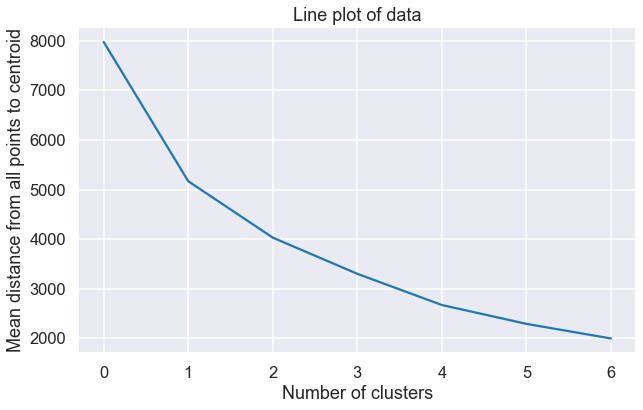

In [89]:
# Elbow-curve

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters

plt.figure(figsize=(10,6))
plt.plot(ssd)
plt.xlabel("Number of clusters")
plt.ylabel("Mean distance from all points to centroid")
plt.title('Line plot of data')

## Silhouette Analysis

### Silhouette score = ( p - q ) / max(p,q)


    The value of the silhouette score range lies between -1 to 1.

    A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

    A score closer to -1 indicates that the data point is not similar to the data points in its cluster.


In [91]:


# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5702830371103056
For n_clusters=3, the silhouette score is 0.46321482502399514
For n_clusters=4, the silhouette score is 0.4525087882565857
For n_clusters=5, the silhouette score is 0.4291220076452775
For n_clusters=6, the silhouette score is 0.44679913079498357
For n_clusters=7, the silhouette score is 0.4493092949983667
For n_clusters=8, the silhouette score is 0.40700431029029227


In [92]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
kmeans.labels_

array([2, 2, 2, ..., 0, 1, 2])

In [94]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,Recency,Frequency,Monetary,Cluster_Id
CustomerID,,,,
12347.0,40,7,163.16,2
12348.0,76,4,331.36,2
12349.0,19,1,15.00,2
12350.0,311,1,25.20,0
12352.0,73,8,536.30,1


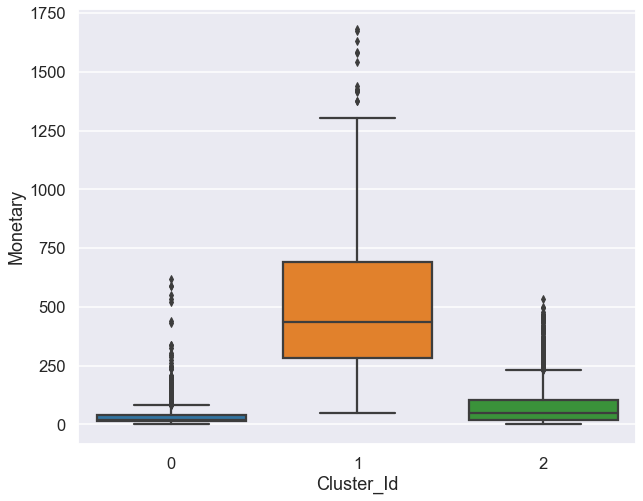

In [100]:
# Box plot to visualize Cluster Id vs Monetary

sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm)

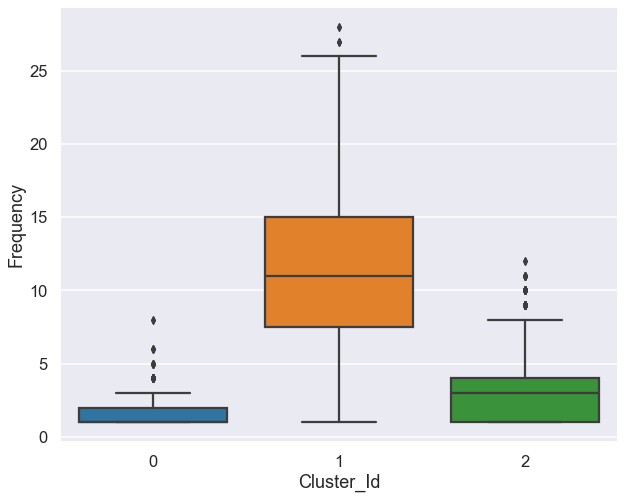

In [101]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

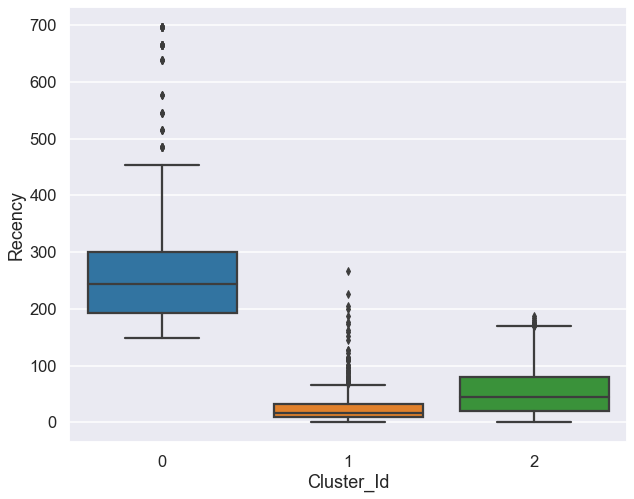

In [102]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

No handles with labels found to put in legend.


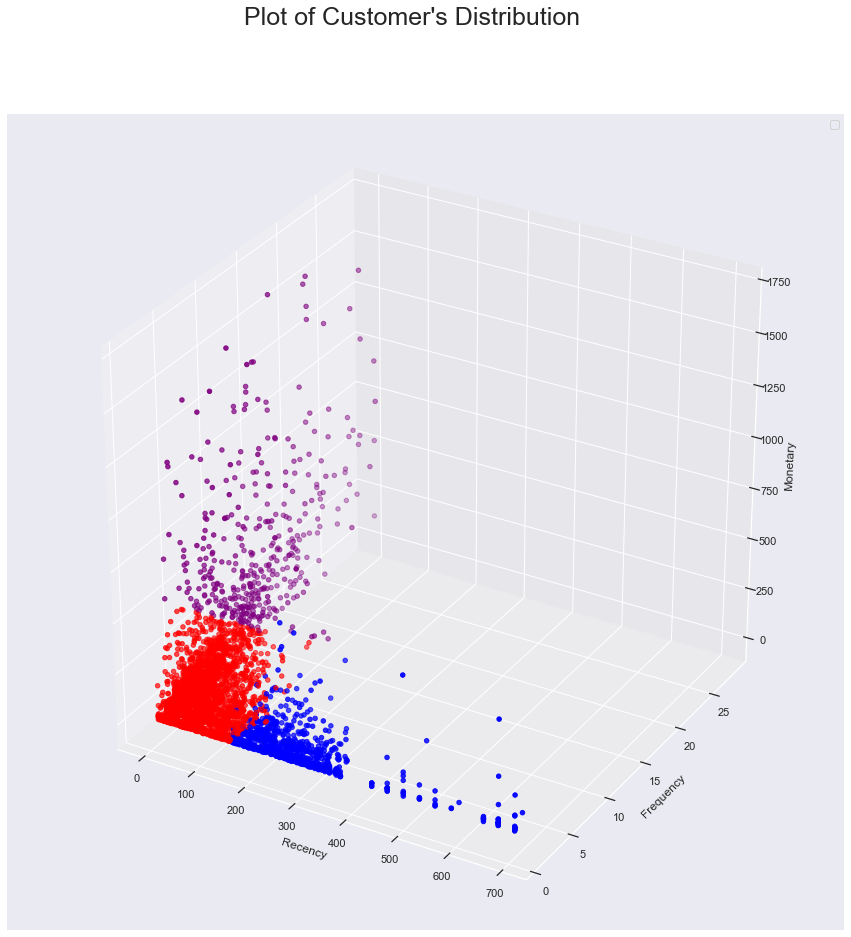

In [108]:
colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["Recency"], rfm["Frequency"], rfm["Monetary"], marker='o', c=colors[rfm["Cluster_Id"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Box plot of the data')

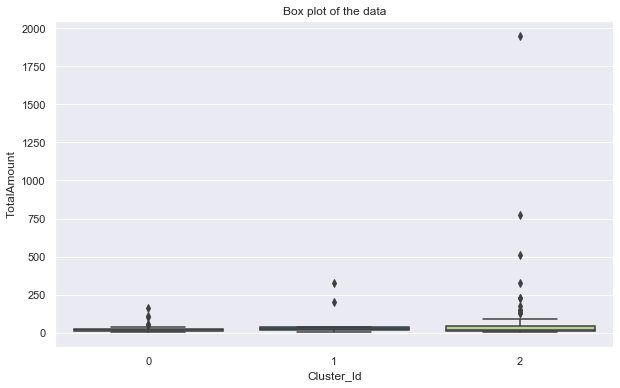

In [125]:
plt.figure(figsize=(10,6))
sns.boxplot(x=rfm.Cluster_Id,y=df.TotalAmount,palette="Paired")
plt.title("Box plot of the data")

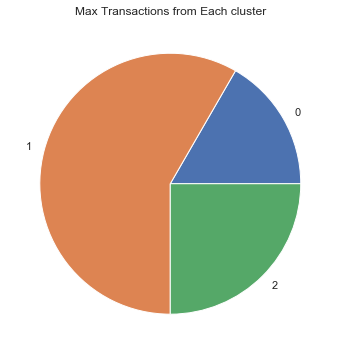

In [130]:
a=rfm.groupby("Cluster_Id").max()["Frequency"]
plt.figure(figsize=(10,6))
plt.pie(a.values,labels=a.index,)
plt.title("Max Transactions from Each cluster")
plt.show()

More number of transactions are in cluster 1.


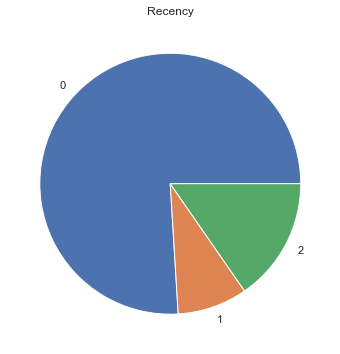

In [132]:
b=rfm.groupby("Cluster_Id").mean()["Recency"]
plt.figure(figsize=(10,6))
plt.pie(b.values,labels=b.index,)
plt.title("Recency")
plt.show()

Recent transactions is in cluster 0.


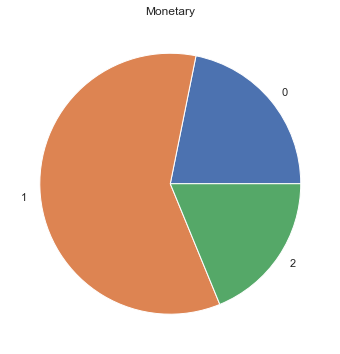

In [133]:
a=rfm.groupby("Cluster_Id").max()["Monetary"]
plt.figure(figsize=(10,6))
plt.pie(a.values,labels=a.index,)
plt.title("Monetary")
plt.show()

People who spend alot of money are in cluster 1.

## Hierarchical Clustering

### Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

    Divisive
    Agglomerative.


### Single Linkage

### In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster.

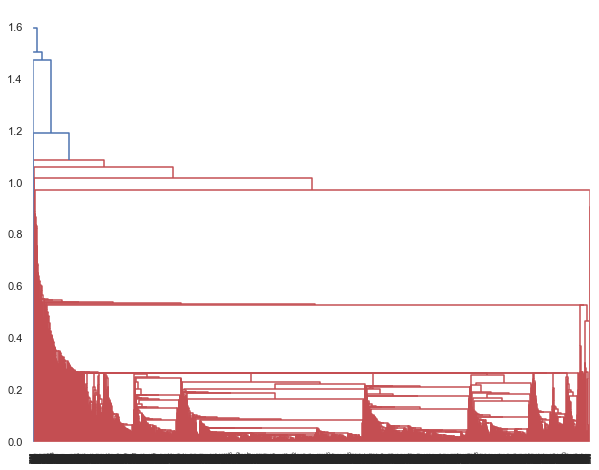

In [110]:
# Single linkage: 

mergings = linkage(rfm_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete Linkage

### In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster.

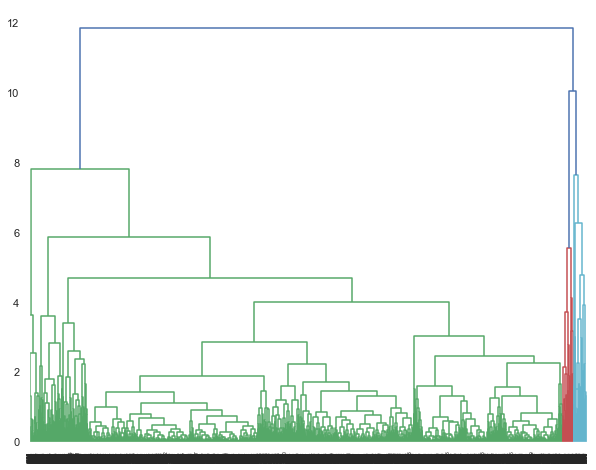

In [112]:
# Complete linkage

mergings = linkage(rfm_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Average Linkage:

### In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.

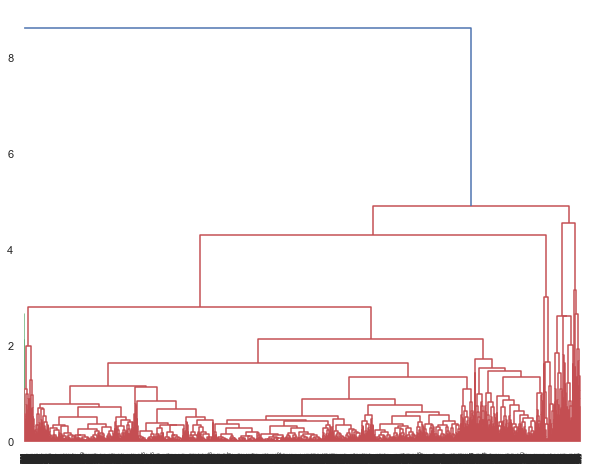

In [113]:
# Average linkage

mergings = linkage(rfm_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

### Cutting the Dendrogram based on K

In [114]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 1, 0])

In [115]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,Recency,Frequency,Monetary,Cluster_Id,Cluster_Labels
CustomerID,,,,,
12347.0,40,7,163.16,2,0
12348.0,76,4,331.36,2,0
12349.0,19,1,15.00,2,0
12350.0,311,1,25.20,0,0
12352.0,73,8,536.30,1,0


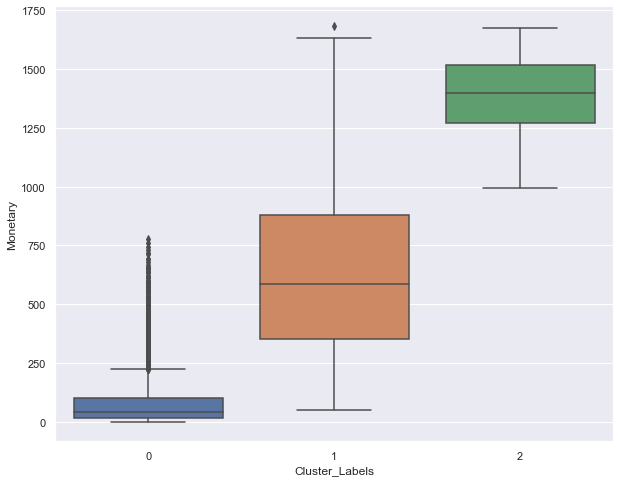

In [116]:
# Plot Cluster Id vs Monetary

sns.boxplot(x='Cluster_Labels', y='Monetary', data=rfm)

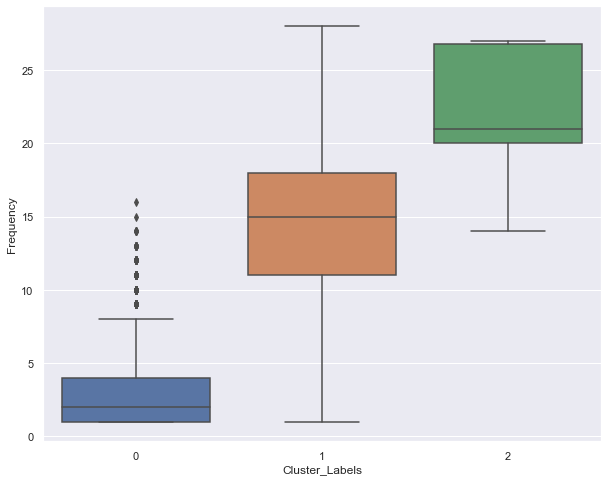

In [117]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

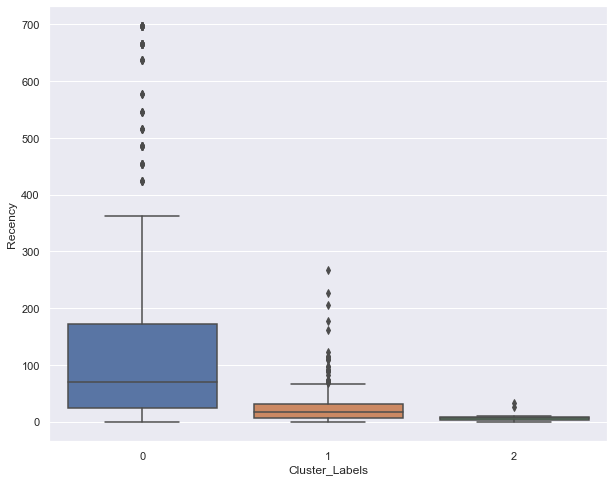

In [118]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

# Thank You.